In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import glob, os
from subprocess import check_output
from PIL import Image

In [118]:
def check_hist_map(img_path):
    image = Image.open(img_path)
    image = np.asarray(image.resize((224, 224), Image.ANTIALIAS))
    dims = np.shape(image)
    print("image dims:", dims)
    print("image min:", np.min(image), "image max:", np.max(image))

    pixel_matrix = np.reshape(image, (dims[0] * dims[1], dims[2]))
    print("flattened image shape: ", np.shape(pixel_matrix))

    _ = plt.hist2d(pixel_matrix[:,1], pixel_matrix[:,2], bins=(50,50))

    return image, pixel_matrix

In [119]:
art_book_cover = 'E:\\PycharmProjects\\book_cover_revised\\book_cover_temp\\Art-Photography\\6xnMsgEACAAJ.jpg'
manga_book_cover = 'E:\PycharmProjects\\book_cover_revised\\book_cover_temp\\Graphic-Novels-Anime-Manga\\fdvrGJ0PdKwC.jpg'

image dims: (224, 224, 3)
image min: 0 image max: 255
flattened image shape:  (50176, 3)


e:\Program Files\miniconda3\envs\miniconda\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  This is separate from the ipykernel package so we can avoid doing imports until


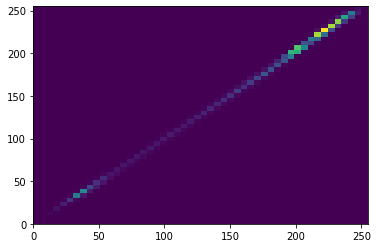

In [120]:
art_iamge, art_pixel_matrix = check_hist_map(art_book_cover)

image dims: (224, 224, 3)
image min: 0 image max: 255
flattened image shape:  (50176, 3)


e:\Program Files\miniconda3\envs\miniconda\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  This is separate from the ipykernel package so we can avoid doing imports until


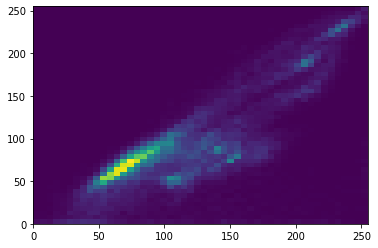

In [121]:
manga_image, manga_pixel_matrix = check_hist_map(manga_book_cover)

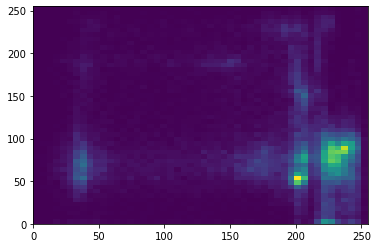

In [122]:
_ = plt.hist2d(art_pixel_matrix[:,2], manga_pixel_matrix[:,2], bins=(50,50))

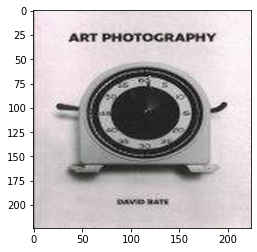

In [123]:
plt.imshow(art_iamge)


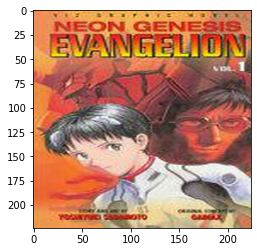

In [124]:
plt.imshow(manga_image)

In [125]:
from sklearn import cluster

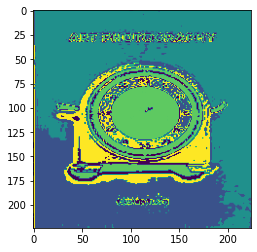

In [126]:
kmeans = cluster.KMeans(5)
clustered = kmeans.fit_predict(art_pixel_matrix)

dims = np.shape(art_iamge)
clustered_img = np.reshape(clustered, (dims[0], dims[1]))
plt.imshow(clustered_img)

In [127]:
ind0, ind1, ind2, ind3 = [np.where(clustered == x)[0] for x in [0, 1, 2, 3]]

Text(0.5, 0, 'Red channel')

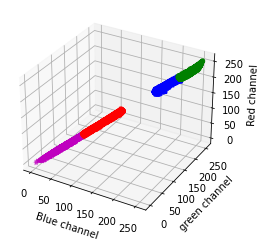

In [128]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

plot_vals = [('r', 'o', ind0),
             ('b', '^', ind1),
             ('g', '8', ind2),
             ('m', '*', ind3)]

for c, m, ind in plot_vals:
    xs = art_pixel_matrix[ind, 0]
    ys = art_pixel_matrix[ind, 1]
    zs = art_pixel_matrix[ind, 2]
    ax.scatter(xs, ys, zs, c=c, marker=m)

ax.set_xlabel('Blue channel')
ax.set_ylabel('green channel')
ax.set_zlabel('Red channel')

e:\Program Files\miniconda3\envs\miniconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
e:\Program Files\miniconda3\envs\miniconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
e:\Program Files\miniconda3\envs\miniconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level functio

<AxesSubplot:ylabel='Density'>

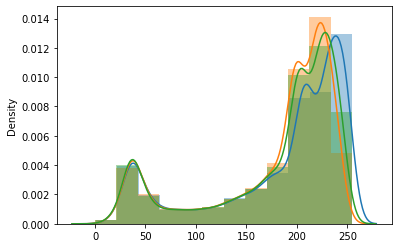

In [129]:
import seaborn as sns
sns.distplot(art_pixel_matrix[:,0], bins=12)
sns.distplot(art_pixel_matrix[:,1], bins=12)
sns.distplot(art_pixel_matrix[:,2], bins=12)

In [145]:
class MSImage():
    """Lightweight wrapper for handling image to matrix transforms. No setters,
    main point of class is to remember image dimensions despite transforms."""
    
    def __init__(self, img):
        """Assume color channel interleave that holds true for this set."""
        self.img = np.asarray(img.resize((224, 224), Image.ANTIALIAS))
        self.dims = np.shape(self.img)
        self.mat = np.reshape(self.img, (self.dims[0] * self.dims[1], self.dims[2]))

    @property
    def matrix(self):
        return self.mat
        
    @property
    def image(self):
        return self.img
    
    def to_flat_img(self, derived):
        """"Use dims property to reshape a derived matrix back into image form when
        derived image would only have one band."""
        return np.reshape(derived, (self.dims[0], self.dims[1]))
    
    def to_matched_img(self, derived):
        """"Use dims property to reshape a derived matrix back into image form."""
        return np.reshape(derived, (self.dims[0], self.dims[1], self.dims[2]))

In [146]:
food_book_cover = Image.open("E:\\PycharmProjects\\book_cover_revised\\book_cover_temp\\Food-Drink\\AoWlCmNDA3QC.jpg")

In [147]:
food_image = MSImage(food_book_cover)

e:\Program Files\miniconda3\envs\miniconda\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  import sys


In [148]:
print(np.shape(food_image.matrix))
print(np.shape(food_image.img))

(50176, 3)
(224, 224, 3)


In [149]:
def bnormalize(mat):
    """much faster brightness normalization, since it's all vectorized"""
    bnorm = np.zeros_like(mat, dtype=np.float32)
    maxes = np.max(mat, axis=1)
    bnorm = mat / np.vstack((maxes, maxes, maxes)).T
    return bnorm

e:\Program Files\miniconda3\envs\miniconda\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """


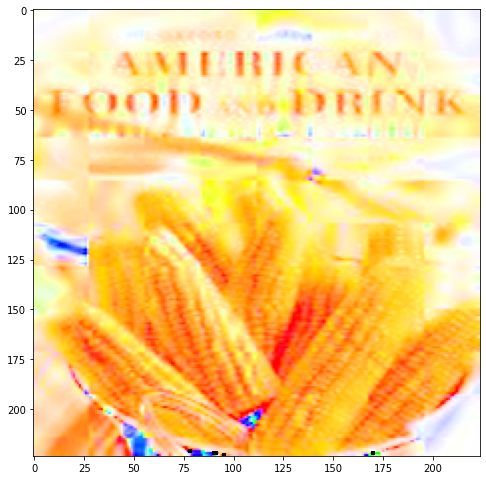

In [150]:
bnorm = bnormalize(food_image.matrix)
bnorm_img = food_image.to_matched_img(bnorm)
plt.figure(figsize=(8,10))
plt.imshow(bnorm_img)
plt.show()

In [151]:
type(bnorm_img)

numpy.ndarray

In [153]:
bnorm_img = Image.fromarray(np.uint8(bnorm_img)).convert('RGB')
ms_food = MSImage(bnorm_img)

e:\Program Files\miniconda3\envs\miniconda\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  import sys


In [154]:
print(ms_food.img)
print(ms_food.matrix)

[[[0 1 0]
  [0 1 0]
  [0 1 0]
  ...
  [0 0 1]
  [0 0 1]
  [0 0 1]]

 [[0 1 0]
  [0 1 0]
  [0 1 0]
  ...
  [0 0 1]
  [0 0 1]
  [0 0 1]]

 [[0 1 0]
  [0 1 0]
  [0 1 0]
  ...
  [0 0 1]
  [0 0 1]
  [0 0 1]]

 ...

 [[1 0 0]
  [1 0 0]
  [1 0 0]
  ...
  [1 0 1]
  [1 0 1]
  [1 0 1]]

 [[1 0 0]
  [1 0 0]
  [1 0 0]
  ...
  [1 0 1]
  [1 0 1]
  [1 0 1]]

 [[1 0 0]
  [1 0 0]
  [1 0 0]
  ...
  [1 0 1]
  [1 0 1]
  [1 0 1]]]
[[0 1 0]
 [0 1 0]
 [0 1 0]
 ...
 [1 0 1]
 [1 0 1]
 [1 0 1]]


e:\Program Files\miniconda3\envs\miniconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
e:\Program Files\miniconda3\envs\miniconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
e:\Program Files\miniconda3\envs\miniconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level functio

<AxesSubplot:ylabel='Density'>

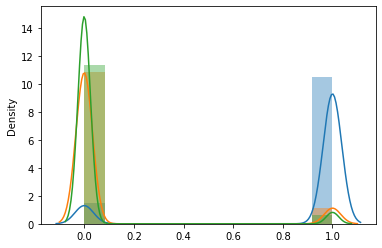

In [155]:
sns.distplot(ms_food.matrix[:,0], bins=12)
sns.distplot(ms_food.matrix[:,1], bins=12)
sns.distplot(ms_food.matrix[:,2], bins=12)

Using thresholds with brightness normalization

Ok, so what am I even doing here? Well, my goal is to try and figure out simple threshold selection methods for getting high albedo targets out of a scene so I could then theoretically track them between scenes. For example, a simple blob/aggregation to centroid (in coordinates or in subsampled image bins) would give me a means to look at plausible structural similarities in distributions between scenes, then use that to anchor a comparison of things that change.

The brightness normalization step is helpful because thresholds that aren't anchored by a preprocessing step end up being arbitrary and can't generalize between scenes even in the same image set, whereas thresholds following brightness normalization tend to pull out materils that stand out from the background more reliably. See the following demonstration:

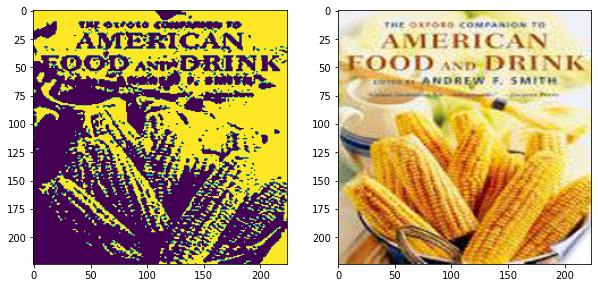

In [158]:
plt.figure(figsize=(10,15))
plt.subplot(121)
plt.imshow(food_image.img[:,:,0] > 230)
plt.subplot(122)
plt.imshow(food_image.img)
plt.show()

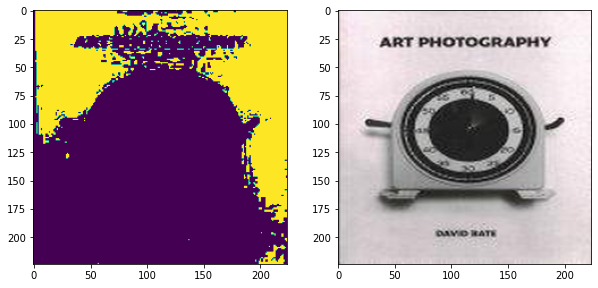

In [159]:
plt.figure(figsize=(10,15))
plt.subplot(121)
plt.imshow(art_iamge[:,:,0] > 230)
plt.subplot(122)
plt.imshow(art_iamge)
plt.show()

In [160]:
print(np.min(np.asarray(bnorm_img)[:,:,0]))
print(np.max(np.asarray(bnorm_img)[:,:,0]))
print(np.mean(np.asarray(bnorm_img)[:,:,0]))
print(np.std(np.asarray(bnorm_img)[:,:,0]))

0
1
0.8772122130102041
0.32819345873424177


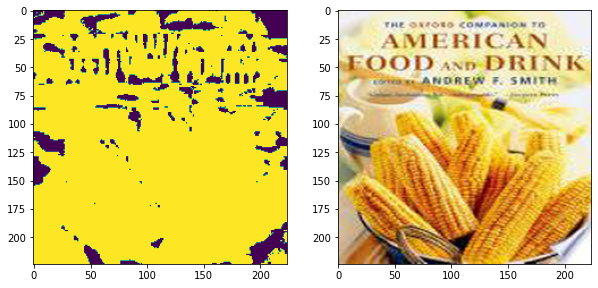

In [163]:

plt.figure(figsize=(10,15))
plt.subplot(121)
plt.imshow(np.asarray(bnorm_img)[:,:,0] > 0.98)
plt.subplot(122)
plt.imshow(food_image.img)
plt.show()

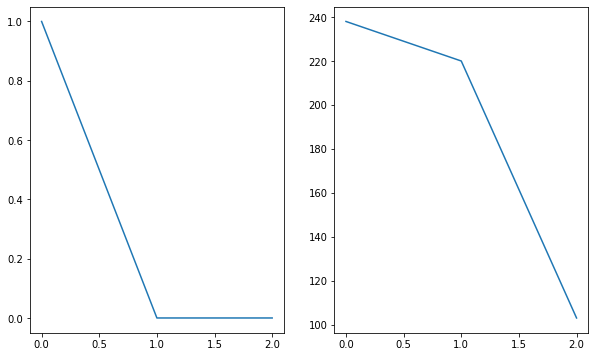

In [164]:
plt.figure(figsize=(10,6))
plt.subplot(121)
plt.plot(np.asarray(bnorm_img)[166, 100, :])
plt.subplot(122)
plt.plot(np.asarray(food_image.img)[166, 100, :])

In [167]:
health_book_cover = Image.open("E:\\PycharmProjects\\book_cover_revised\\book_cover_temp\Health\\ZfnIrQEACAAJ.jpg")

In [168]:
health_image = MSImage(health_book_cover)

e:\Program Files\miniconda3\envs\miniconda\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  import sys


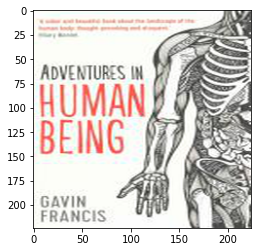

In [169]:

plt.imshow(health_image.image)


Sobel Edge Detection

A Sobel filter is one means of getting a basic edge magnitude/gradient image. Can be useful to threshold and find prominent linear features, etc. Several other similar filters in skimage.filters are also good edge detectors: roberts, scharr, etc. and you can control direction, i.e. use an anisotropic version.

In [170]:
import skimage
from skimage.feature import greycomatrix, greycoprops
from skimage.filters import sobel

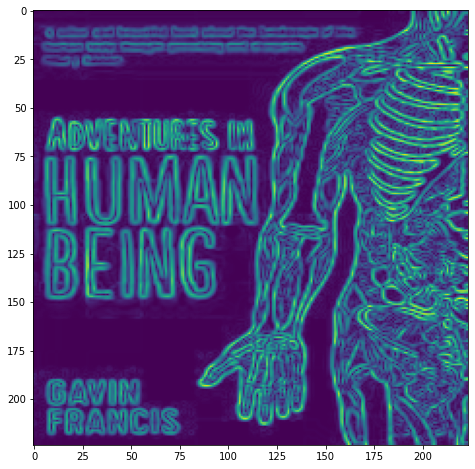

In [171]:
fig = plt.figure(figsize=(8, 8))
plt.imshow(sobel(health_image.img[:750,:750,2]))

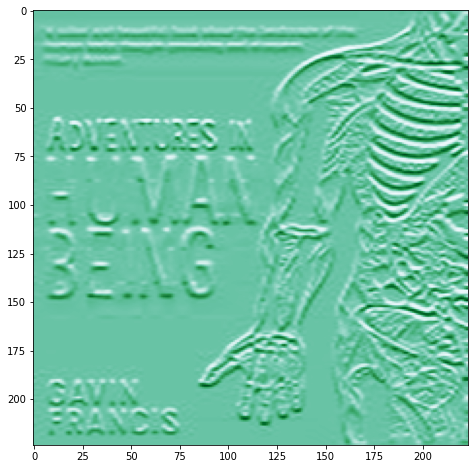

In [172]:
from skimage.filters import sobel_h

# can also apply sobel only across one direction.
fig = plt.figure(figsize=(8, 8))
plt.imshow(sobel_h(health_image.img[:750,:750,2]), cmap='BuGn')

In [173]:
from sklearn.decomposition import PCA

pca = PCA(3)
pca.fit(health_image.matrix)
health_pca = pca.transform(health_image.matrix)
health_pca_img = health_image.to_matched_img(health_pca)

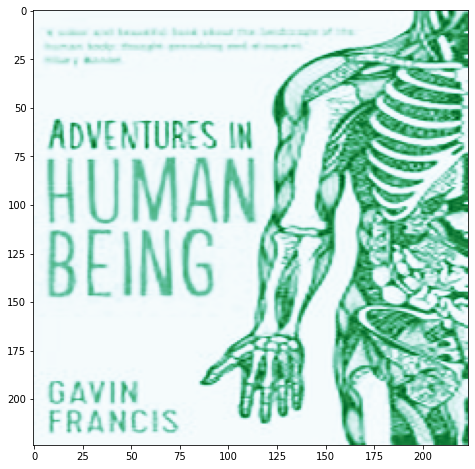

In [174]:
fig = plt.figure(figsize=(8, 8))
plt.imshow(health_pca_img[:,:,0], cmap='BuGn')



GLCM Textures

Processing time can be pretty brutal so we subset the image. We'll create texture images so we can characterize each pixel by the texture of its neighborhood.

GLCM is inherently anisotropic but can be averaged so as to be rotation invariant. For more on GLCM, see the tutorial.

A good article on use in remote sensing is here:

Pesaresi, M., Gerhardinger, A., & Kayitakire, F. (2008). A robust built-up area presence index by anisotropic rotation-invariant textural measure. Selected Topics in Applied Earth Observations and Remote Sensing, IEEE Journal of, 1(3), 180-192.

In [181]:
sub = health_image.img[:150,:150,2]

In [182]:
def glcm_image(img, measure="dissimilarity"):
    """TODO: allow different window sizes by parameterizing 3, 4. Also should
    parameterize direction vector [1] [0]"""
    texture = np.zeros_like(sub)

    # quadratic looping in python w/o vectorized routine, yuck!
    for i in range(img.shape[0] ):  
        for j in range(sub.shape[1] ):  
          
            # don't calculate at edges
            if (i < 3) or \
               (i > (img.shape[0])) or \
               (j < 3) or \
               (j > (img.shape[0] - 4)):          
                continue  
        
            # calculate glcm matrix for 7 x 7 window, use dissimilarity (can swap in
            # contrast, etc.)
            glcm_window = img[i-3: i+4, j-3 : j+4]  
            glcm = greycomatrix(glcm_window, [1], [0],  symmetric = True, normed = True )   
            texture[i,j] = greycoprops(glcm, measure)  
    return texture

In [183]:
dissimilarity = glcm_image(sub, "dissimilarity")

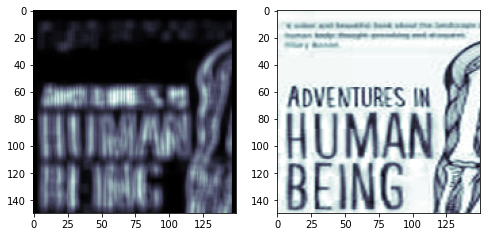

In [184]:
fig = plt.figure(figsize=(8, 8))
plt.subplot(1,2,1)
plt.imshow(dissimilarity, cmap="bone")
plt.subplot(1,2,2)
plt.imshow(sub, cmap="bone")

HSV Transform

Since this contest is about time series ordering, I think it's possible there may be useful information in a transform to HSV color space. HSV is useful for identifying shadows and illumination, as well as giving us a means to identify similar objects that are distinct by color between scenes (hue), though there's no guarantee the hue will be stable.

In [185]:
from skimage import color

hsv = color.rgb2hsv(health_image.img)

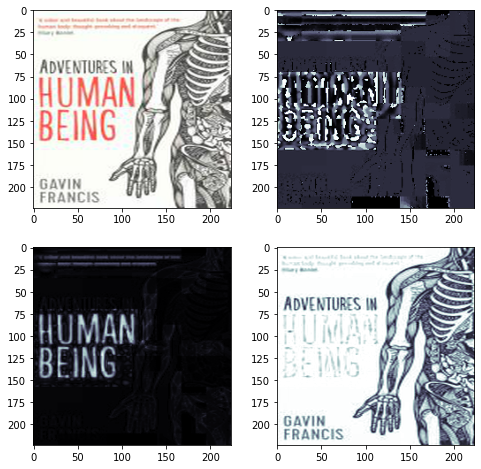

In [186]:
fig = plt.figure(figsize=(8, 8))
plt.subplot(2,2,1)
plt.imshow(health_image.img, cmap="bone")
plt.subplot(2,2,2)
plt.imshow(hsv[:,:,0], cmap="bone")
plt.subplot(2,2,3)
plt.imshow(hsv[:,:,1], cmap='bone')
plt.subplot(2,2,4)
plt.imshow(hsv[:,:,2], cmap='bone')

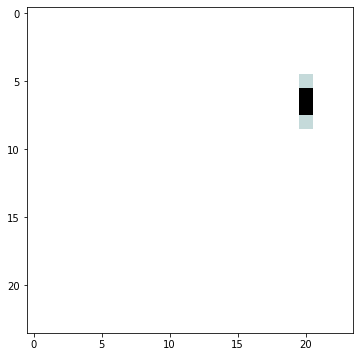

In [187]:
fig = plt.figure(figsize=(8, 6))
plt.imshow(hsv[200:500,200:500,0], cmap='bone')

In [189]:
hsv = Image.fromarray(np.uint8(hsv)).convert('RGB')
hsvmsi = MSImage(hsv)

e:\Program Files\miniconda3\envs\miniconda\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  import sys


Shadow Detection

We can apply a threshold to the V band now to find dark areas that are probably thresholds. Let's look at the distribution of all values then work interactively to find a good filter value.

e:\Program Files\miniconda3\envs\miniconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
e:\Program Files\miniconda3\envs\miniconda\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
e:\Program Files\miniconda3\envs\miniconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
e:\Program Files\miniconda3\envs\miniconda\lib\site-packages\seab

<AxesSubplot:ylabel='Density'>

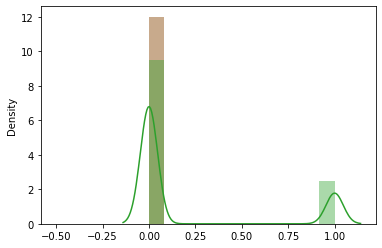

In [190]:
import seaborn as sns
sns.distplot(hsvmsi.matrix[:,0], bins=12)
sns.distplot(hsvmsi.matrix[:,1], bins=12)
sns.distplot(hsvmsi.matrix[:,2], bins=12)

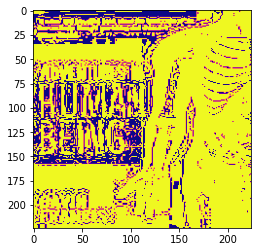

In [191]:
plt.imshow(hsvmsi.image[:,:,2] < 0.4, cmap="plasma")

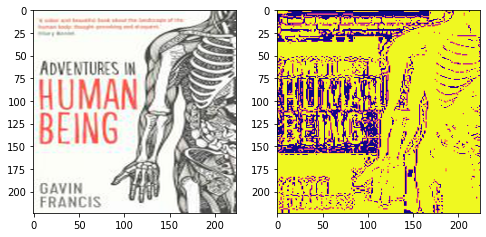

In [192]:
fig = plt.figure(figsize=(8, 8))
plt.subplot(1,2,1)
plt.imshow(health_image.img[:250,:250,:])
plt.subplot(1,2,2)
plt.imshow(hsvmsi.img[:250,:250,2] < 0.4, cmap="plasma")

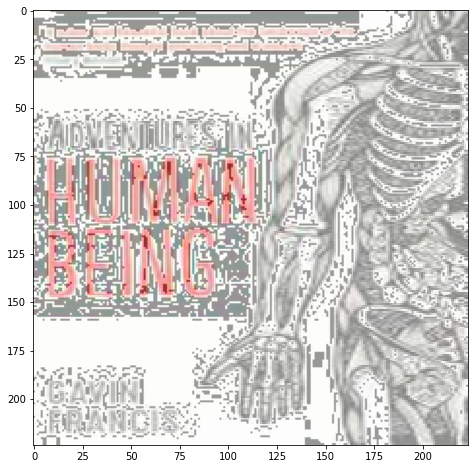

In [193]:
fig = plt.figure(figsize=(8, 8))
img2 = plt.imshow(health_image.img[:250,:250,:], interpolation='nearest')
img3 = plt.imshow(hsvmsi.img[:250,:250,2] < 0.4, cmap='binary_r', alpha=0.4)
plt.show()


Image Registration

This is an earlier form the library found here.

BSD family license, reproduced below with copyright so I can utilize similar functions here where import isn't available.

This version can be found here.

In [194]:
from __future__ import division, print_function

import math
from numpy.fft import fft2, ifft2, fftshift
import scipy.ndimage.interpolation as ndii


In [195]:
def translation(im0, im1):
    """Return translation vector to register images."""
    shape = im0.shape
    f0 = fft2(im0)
    f1 = fft2(im1)
    ir = abs(ifft2((f0 * f1.conjugate()) / (abs(f0) * abs(f1))))
    t0, t1 = np.unravel_index(np.argmax(ir), shape)
    if t0 > shape[0] // 2:
        t0 -= shape[0]
    if t1 > shape[1] // 2:
        t1 -= shape[1]
    return [t0, t1]

In [197]:
def highpass(shape):
    """Return highpass filter to be multiplied with fourier transform."""
    x = np.outer(
        np.cos(np.linspace(-math.pi/2., math.pi/2., shape[0])),
        np.cos(np.linspace(-math.pi/2., math.pi/2., shape[1])))
    return (1.0 - x) * (2.0 - x)

In [199]:
def logpolar(image, angles=None, radii=None):
    """Return log-polar transformed image and log base."""
    shape = image.shape
    center = shape[0] / 2, shape[1] / 2
    if angles is None:
        angles = shape[0]
    if radii is None:
        radii = shape[1]
    theta = np.empty((angles, radii), dtype=np.float64)
    theta.T[:] = -np.linspace(0, np.pi, angles, endpoint=False)
    #d = radii
    d = np.hypot(shape[0]-center[0], shape[1]-center[1])
    log_base = 10.0 ** (math.log10(d) / (radii))
    radius = np.empty_like(theta)
    radius[:] = np.power(log_base, np.arange(radii,
                                                   dtype=np.float64)) - 1.0
    x = radius * np.sin(theta) + center[0]
    y = radius * np.cos(theta) + center[1]
    output = np.empty_like(x)
    ndii.map_coordinates(image, [x, y], output=output)
    return output, log_base

In [209]:
def similarity(im0, im1):
    """Return similarity transformed image im1 and transformation parameters.

    Transformation parameters are: isotropic scale factor, rotation angle (in
    degrees), and translation vector.

    A similarity transformation is an affine transformation with isotropic
    scale and without shear.

    Limitations:
    Image shapes must be equal and square.
    All image areas must have same scale, rotation, and shift.
    Scale change must be less than 1.8.
    No subpixel precision.

    """
    if im0.shape != im1.shape:
        raise ValueError("Images must have same shapes.")
    elif len(im0.shape) != 2:
        raise ValueError("Images must be 2 dimensional.")

    f0 = fftshift(abs(fft2(im0)))
    f1 = fftshift(abs(fft2(im1)))

    h = highpass(f0.shape)
    f0 *= h
    f1 *= h
    del h

    f0, log_base = logpolar(f0)
    f1, log_base = logpolar(f1)

    f0 = fft2(f0)
    f1 = fft2(f1)
    r0 = abs(f0) * abs(f1)
    ir = abs(ifft2((f0 * f1.conjugate()) / r0))
    i0, i1 = np.unravel_index(np.argmax(ir), ir.shape)
    angle = 180.0 * i0 / ir.shape[0]
    scale = log_base ** i1

    if scale > 1.8:
        ir = abs(ifft2((f1 * f0.conjugate()) / r0))
        i0, i1 = np.unravel_index(np.argmax(ir), ir.shape)
        angle = -180.0 * i0 / ir.shape[0]
        scale = 1.0 / (log_base ** i1)
        if scale > 1.8:
            raise ValueError("Images are not compatible. Scale change > 1.8")

    if angle < -90.0:
        angle += 180.0
    elif angle > 90.0:
        angle -= 180.0

    im2 = ndii.zoom(im1, 1.0/scale)
    im2 = ndii.rotate(im2, angle)

    if im2.shape < im0.shape:
        t = np.zeros_like(im0)
        t[:im2.shape[0], :im2.shape[1]] = im2
        im2 = t
    elif im2.shape > im0.shape:
        im2 = im2[:im0.shape[0], :im0.shape[1]]

    f0 = fft2(im0)
    f1 = fft2(im2)
    ir = abs(ifft2((f0 * f1.conjugate()) / (abs(f0) * abs(f1))))
    t0, t1 = np.unravel_index(np.argmax(ir), ir.shape)

    if t0 > f0.shape[0] // 2:
        t0 -= f0.shape[0]
    if t1 > f0.shape[1] // 2:
        t1 -= f0.shape[1]

    im2 = ndii.shift(im2, [t0, t1])

    # correct parameters for ndimage's internal processing
    if angle > 0.0:
        d = int((int(im1.shape[1] / scale) * math.sin(math.radians(angle))))
        t0, t1 = t1, d+t0
    elif angle < 0.0:
        d = int((int(im1.shape[0] / scale) * math.sin(math.radians(angle))))
        t0, t1 = d+t1, d+t0
    scale = (im1.shape[1] - 1) / (int(im1.shape[1] / scale) - 1)

    return im2, scale, angle, [-t0, -t1]

In [200]:
def similarity_matrix(scale, angle, vector):
    """Return homogeneous transformation matrix from similarity parameters.

    Transformation parameters are: isotropic scale factor, rotation angle (in
    degrees), and translation vector (of size 2).

    The order of transformations is: scale, rotate, translate.

    """
    S = np.diag([scale, scale, 1.0])
    R = np.identity(3)
    angle = math.radians(angle)
    R[0, 0] = math.cos(angle)
    R[1, 1] = math.cos(angle)
    R[0, 1] = -math.sin(angle)
    R[1, 0] = math.sin(angle)
    T = np.identity(3)
    T[:2, 2] = vector
    return np.dot(T, np.dot(R, S))

In [202]:
def imread(fname, norm=True):
    """Return image data from img&hdr uint8 files."""
    with open(fname+'.hdr', 'r') as fh:
        hdr = fh.readlines()
    img = np.fromfile(fname+'.img', np.uint8, -1)
    img.shape = int(hdr[4].split()[-1]), int(hdr[3].split()[-1])
    if norm:
        img = img.astype(np.float64)
        img /= 255.0
    return img

In [203]:
def imshow(im0, im1, im2, im3=None, cmap=None, **kwargs):
    """Plot images using matplotlib."""
    from matplotlib import pyplot
    if cmap is None:
        cmap = 'coolwarm'
    if im3 is None:
        im3 = abs(im2 - im0)
    pyplot.subplot(221)
    pyplot.imshow(im0, cmap, **kwargs)
    pyplot.subplot(222)
    pyplot.imshow(im1, cmap, **kwargs)
    pyplot.subplot(223)
    pyplot.imshow(im3, cmap, **kwargs)
    pyplot.subplot(224)
    pyplot.imshow(im2, cmap, **kwargs)
    pyplot.show()

In [211]:
thriller_book_cover = np.asarray(Image.open("E:\PycharmProjects\\book_cover_revised\\book_cover_temp\\Crime-Thriller\\2AEynwEACAAJ.jpg").resize((224,224)))
religion_book_cover = np.asarray(Image.open("E:\\PycharmProjects\\book_cover_revised\\book_cover_temp\Religion\\8Tz7DwAAQBAJ.jpg").resize((224, 224)))

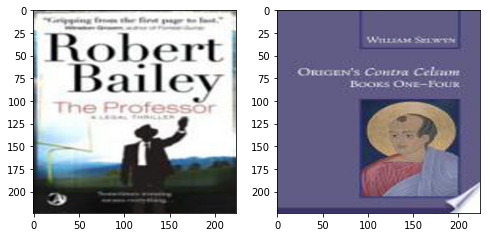

In [212]:
plt.figure(figsize=(8,10))
plt.subplot(121)
plt.imshow(thriller_book_cover)
plt.subplot(122)
plt.imshow(religion_book_cover)

In [213]:
img3, scale, angle, (t0, t1) = similarity(thriller_book_cover[:,:,2], religion_book_cover[:,:,2])

Viewing registration


We should be looking at:

UL: template for transformation

UR: image that was transformed

LL: diff after transformation

LR: transformed image

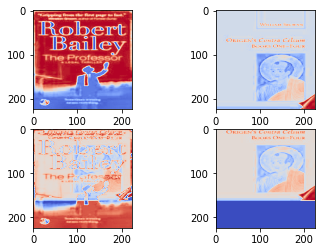

In [214]:
imshow(thriller_book_cover[:,:,2], religion_book_cover[:,:,2], img3)

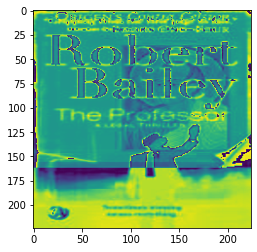

In [215]:
plt.imshow(img3 - thriller_book_cover[:,:,2])

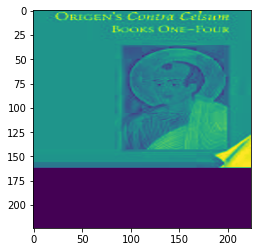

In [216]:
plt.imshow(img3)

NN with Downscaled Red Band Image


I'm exploring the best way to feed images into a siamese net like the one described here and here.

Ideally you'd want to build the DNN to function this way:

Feed in two images as in diagram in paper [1]: "A central-surround two-stream network that uses a siamese-type architecture to process each stream"
Train the DNN to learn a simple comparison function: 1 if image is before, 0 if false (no simultaneously captured images so no equality).
Once you have this comparator, then you can apply a sorting alrogithm to sort each dataset.

There are lots of details to be worked out here, still -- mainly trying to select overlapping image patches.

In [218]:
from skimage.transform import downscale_local_mean

img1 = thriller_book_cover[:,:,2]
img2 = religion_book_cover[:,:,2]

In [219]:
np.shape(img1), np.shape(img2)

((224, 224), (224, 224))

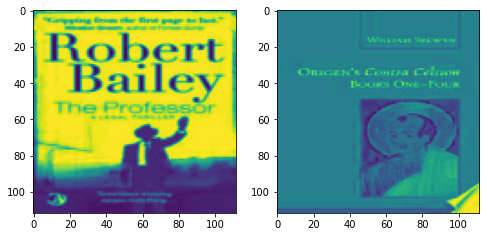

In [222]:
img1ds = downscale_local_mean(img1, (2, 2))
img2ds = downscale_local_mean(img2, (2, 2))
plt.figure(figsize=(8,10))
plt.subplot(121)
plt.imshow(img1ds[:225,:300])
plt.subplot(122)
plt.imshow(img2ds[:225,:300])

In [223]:
def read_and_downscale(f):
    img = plt.imread(f)
    ds = downscale_local_mean(img[:,:,2], (10, 10))
    return ds[:225, :300]